In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score,silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Display basic information about the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Description:")
print(data.describe())
print("\nDataset Columns:")
print(data.columns)

Dataset Head:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2     

In [28]:
# Verify if 'quality' column exists
if 'quality' not in data.columns:
    raise KeyError("The 'quality' column is not found in the dataset. Please check the dataset.")


data = data.dropna()


Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers removed: {outlier_condition.sum()}")
data = data[~outlier_condition]


#  quality for classification (quality >= 6 is good wine, else bad wine)
data['quality_label'] = (data['quality'] >= 6).astype(int)


X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']


Number of outliers removed: 420


In [29]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nSupervised Learning: Random Forest Classification")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Supervised Learning: Random Forest Classification
Accuracy: 0.82
Precision: 0.84
Recall: 0.82
F1 Score: 0.83


In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to data
data['Cluster'] = kmeans.labels_

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

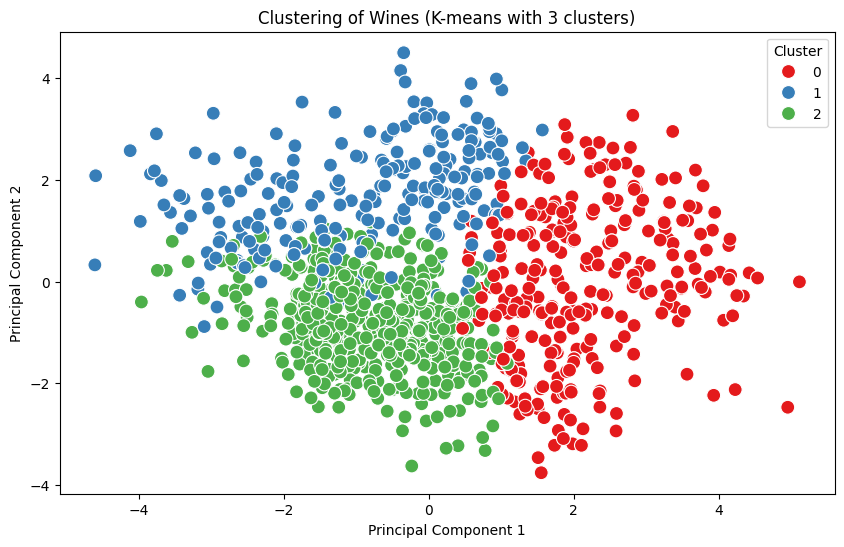

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
plt.title("Clustering of Wines (K-means with 3 clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

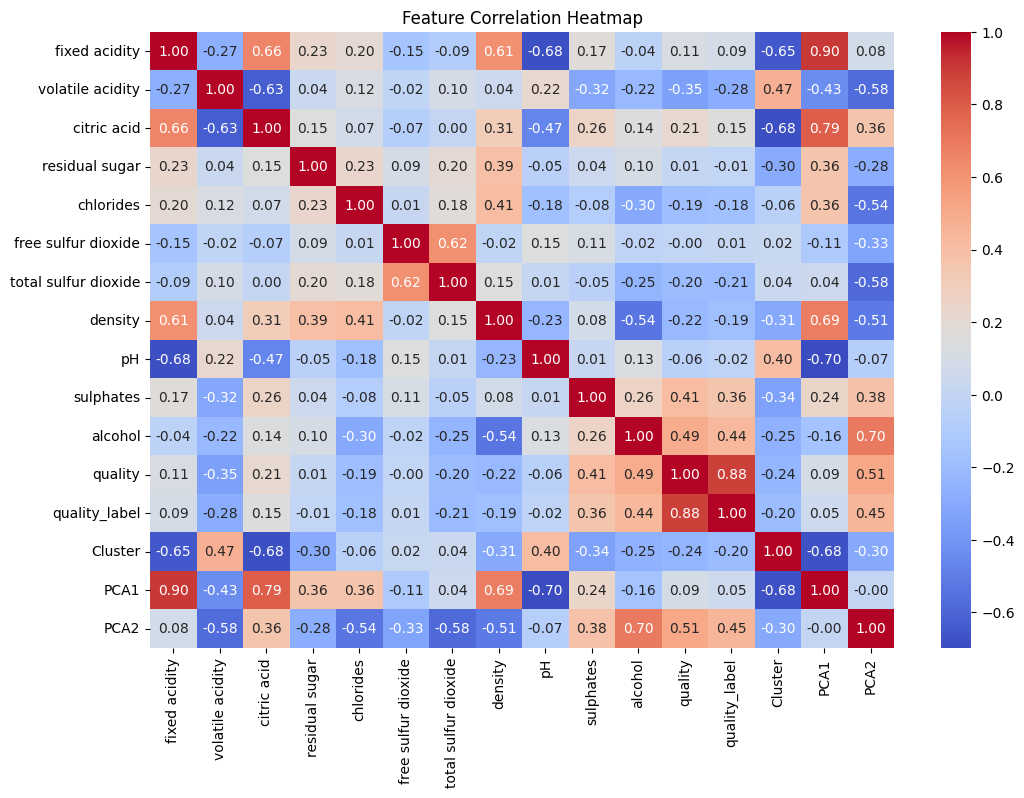

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

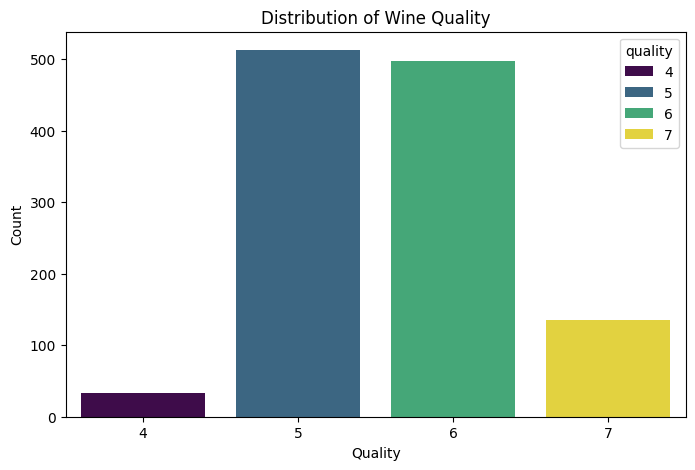

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, hue='quality', palette='viridis')
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

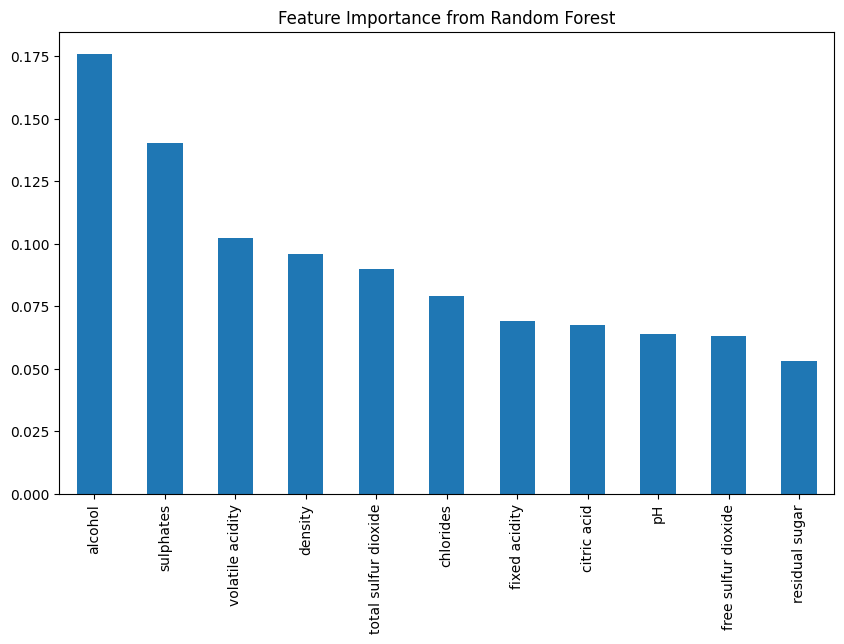

In [35]:
feature_importances = pd.Series(rf.feature_importances_, index=data.drop(['quality', 'quality_label', 'Cluster', 'PCA1', 'PCA2'], axis=1).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance from Random Forest")
plt.show()

In [36]:
# K-means Evaluation Metrics
silhouette = silhouette_score(X_scaled, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X_scaled, kmeans.labels_)
inertia = kmeans.inertia_

print("\nUnsupervised Learning: K-means Clustering Evaluation")
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")
print(f"Inertia: {inertia:.2f}")


Unsupervised Learning: K-means Clustering Evaluation
Silhouette Score: 0.17
Davies-Bouldin Index: 1.86
Inertia: 9361.64
